In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

warnings.filterwarnings('ignore')
%matplotlib inline

### First things first, let's load the dataset and have some basic viewing/checks

In [2]:
#Load the dataset
df_train = pd.read_csv('C:\\Users\\tayat\\Documents\\udacity\\Project 1\\house-prices-advanced-regression-techniques\\train.csv')

In [3]:
#Check the dataset shape
df_train.shape

(1460, 81)

In [4]:
#Set panadas viewing options to be able to see the whole columns
pd.set_option('display.max_columns', 82)
pd.set_option('display.max_rows', 100)

In [5]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
#List the columns names with thier datatypes
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
#Describe the dataset numerical columns
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Some features were identified as numerical, but they are categorical, let's convet them to categorical

In [26]:
df_train = df_train.astype({'MSSubClass': 'object', 'OverallQual': 'object', 'OverallCond': 'object'})

### Let's view missing values per feature

In [8]:
datamissing = pd.concat([df_train.isnull().sum(), (df_train.isnull().sum()/df_train.isnull().count())], axis=1, keys=['MissingCount', 'Percent'])
datamissing.head(100)

,MissingCount,Percent
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


### First business question:
### - What is the best sale time along the year in terms of price and opportunity to sell?
### Seems that sale price does not change so much over year months, but on the other hand the number of sales is much higher in May, Jun and Jul which indicates that this is the best time for owners who require fast selling

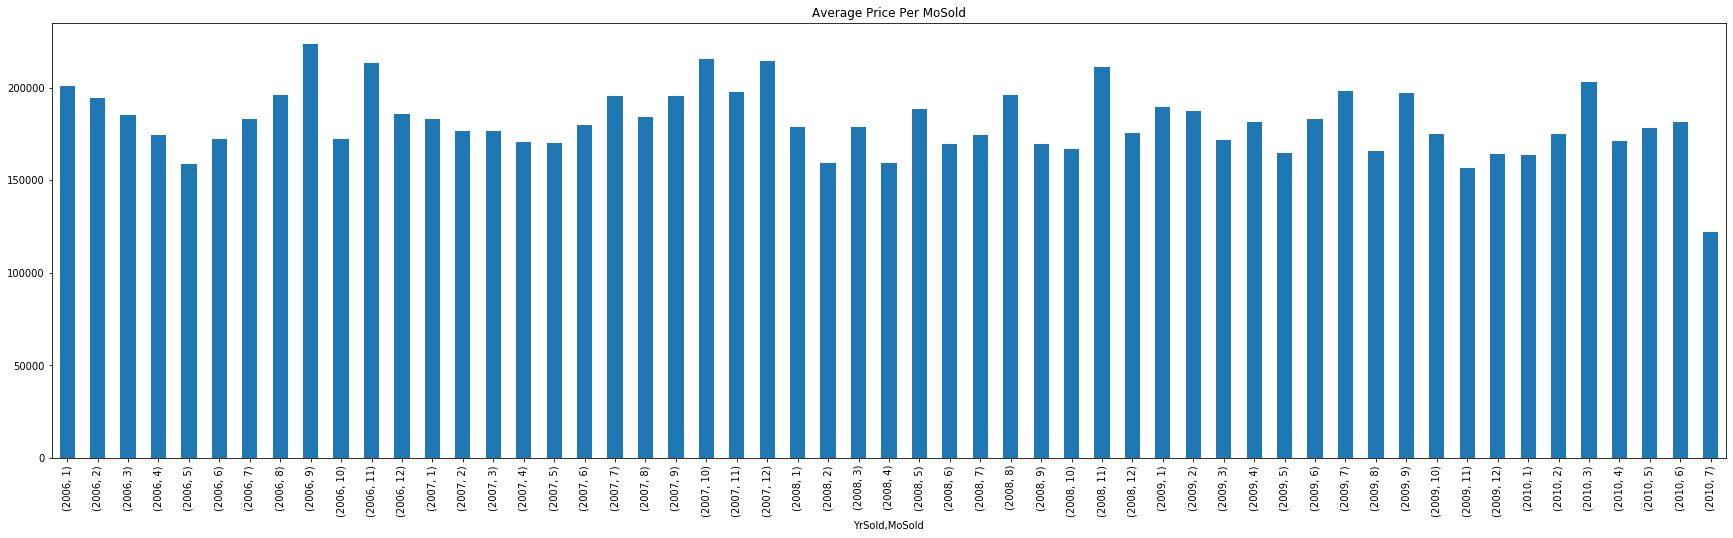

In [106]:
#let's have a look at the sale price over time (selling year and month)
df_train.groupby(['YrSold','MoSold']).mean()['SalePrice'].plot(kind="bar", figsize = (30, 8));
plt.title("Average Price Per MoSold");

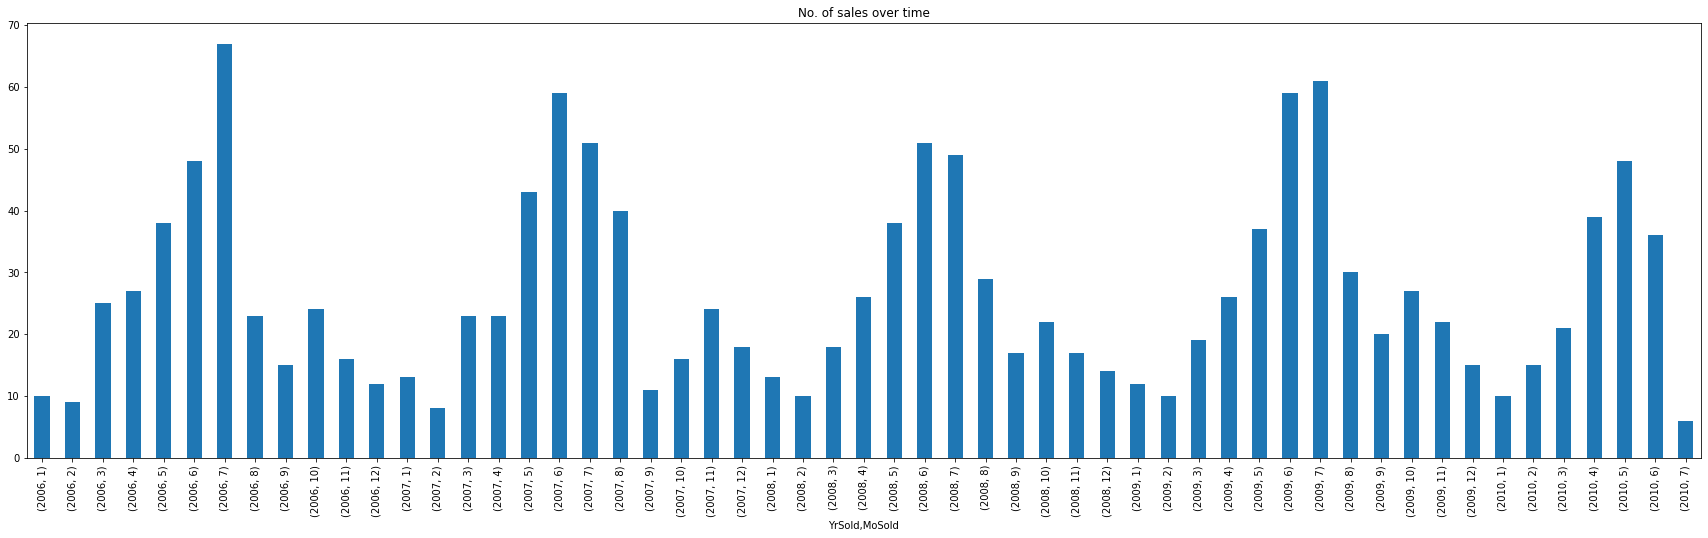

In [108]:
#let's have a look at the count of sold units over time (selling year and month)
df_train.groupby(['YrSold','MoSold']).count()['SalePrice'].plot(kind="bar", figsize = (30, 8));
plt.title("No. of sales over time");

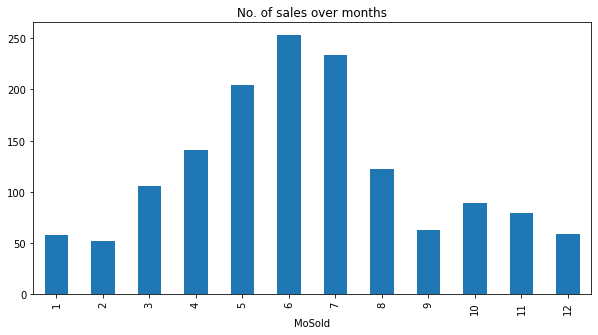

In [111]:
#let's have a look at the count of sold units over sold_month
df_train.groupby(['MoSold']).count()['SalePrice'].plot(kind="bar", figsize = (10, 5));
plt.title("No. of sales over months");

### Second business question:
### - Which neighborhoods has the highest count of sold units?
### Below count of sales per Neighborhood indicates that some Neighborhoods like "North Ames" has higher demand than other Neighborhoods like "Bluestem"

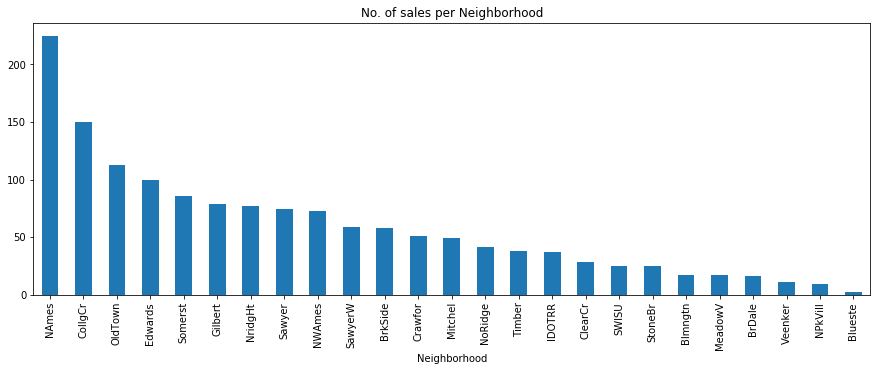

In [113]:
#let's have a look at the count of sold units per different Neighborhoods
df_train.groupby(['Neighborhood']).count()['SalePrice'].sort_values(ascending=False).plot(kind="bar", figsize = (15, 5));
plt.title("No. of sales per Neighborhood");

### Third question:
### - What features affect the sale price and how can we predict it?

### Let's think of factors that may affect the sales price, I have the following factors in mind (Building Type, Area, Location, quality of building and finishing, utilities, How old it is, has parking or not, Type of sale)

### The features that reflect the above factors are:
##### MSSubClass, MSZoning, Utilities, Neighborhood, BldgType, HouseStyle, OverallCond, HeatingQC, CentralAir, SaleType, YearBuilt --> these are categorical features
#### GrLivArea, TotRmsAbvGrd, GarageArea

### Now let's have a look at the salesprice distribution (somehow if follow a normal distribution)

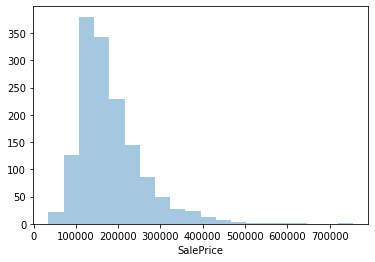

In [24]:
sns.distplot(df_train['SalePrice'], bins=20, kde=False, norm_hist=False);

### let's have a look at the above features that we expect to affect the sale price

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

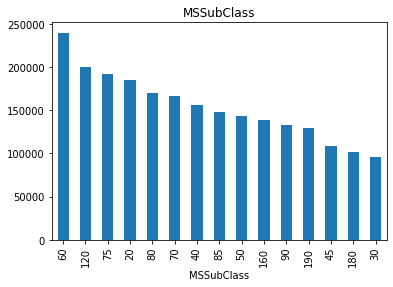

In [36]:
# almost have the dataset are types 20 (1-STORY 1946 & NEWER ALL STYLES) which lies in the upper quartile of average prices 
# and 60 (2-STORY 1946 & NEWER) which have the highest average price
# both of them are new building (newer than 1946) which might indicate that YearBuilt will be a good feature

df_train.groupby(['MSSubClass']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("MSSubClass");
df_train['MSSubClass'].value_counts().sort_values(ascending=False)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

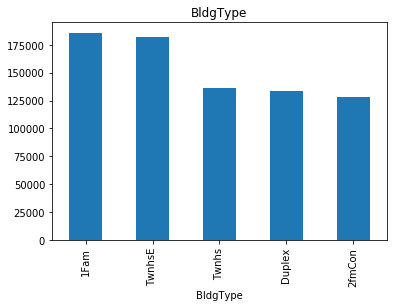

In [38]:
# Most of the assets are 1Fam "Single-family"
# the average price for "TwnhsI", "Duplx", "2FmCon" almsot have the same average price with low count
# This might not be a good feature to represent the sales price

df_train.groupby(['BldgType']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("BldgType");
df_train['BldgType'].value_counts().sort_values(ascending=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

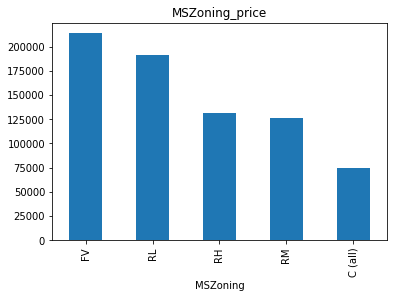

In [39]:
# FV "Floating Village Residential" is the most repeated with highest average price
# Although most of the assets are FV, the average price vary from zone to another
# Might be a good feature to consider

df_train.groupby(['MSZoning']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("MSZoning_price");
df_train['MSZoning'].value_counts().sort_values(ascending=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

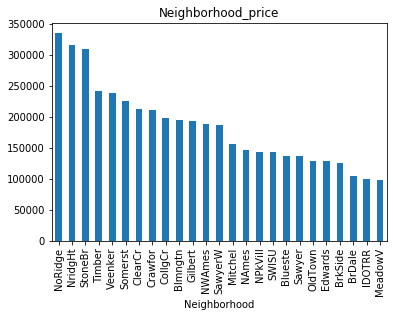

In [40]:
# We can notice that the average price vary by neighborhood
# Might be a good feature that affects the sale price

df_train.groupby(['Neighborhood']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("Neighborhood_price");
df_train['Neighborhood'].value_counts().sort_values(ascending=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

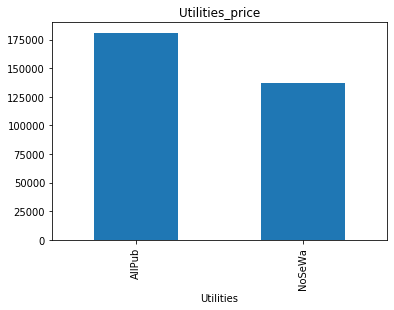

In [41]:
# All the assets except one has all utilities, so I'll drop this feature

df_train.groupby(['Utilities']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("Utilities_price");
df_train['Utilities'].value_counts().sort_values(ascending=False)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

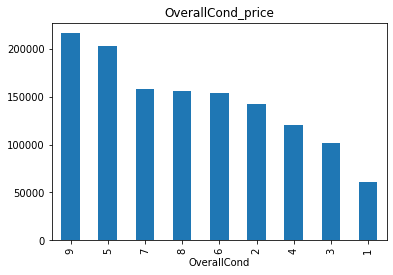

In [42]:
# From the below we notice that OverallQual has strong relation with the price more than OverallCond
# I'll consider OverallQual as a feature

df_train.groupby(['OverallCond']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("OverallCond_price");
df_train['OverallCond'].value_counts().sort_values(ascending=False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

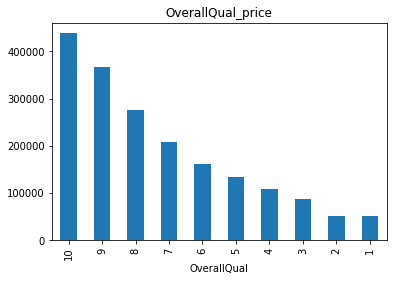

In [43]:
df_train.groupby(['OverallQual']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("OverallQual_price");
df_train['OverallQual'].value_counts().sort_values(ascending=False)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

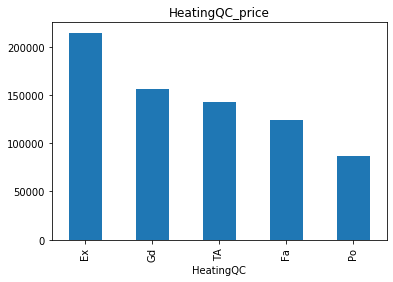

In [44]:
# Average price vary per HeatingQC (Heating quality and condition)
# I'll consider this feature

df_train.groupby(['HeatingQC']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("HeatingQC_price");
df_train['HeatingQC'].value_counts().sort_values(ascending=False)

Y    1365
N      95
Name: CentralAir, dtype: int64

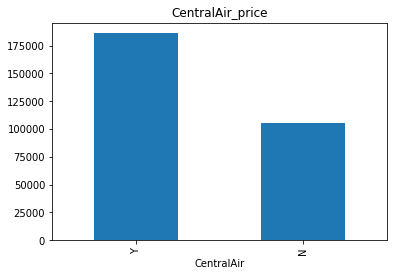

In [45]:
# Most of the assets have central AC, but the average price of Non-centraized AC assets is almot the half of assets with central AC
# I'll consider this feature

df_train.groupby(['CentralAir']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("CentralAir_price");
df_train['CentralAir'].value_counts().sort_values(ascending=False)

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

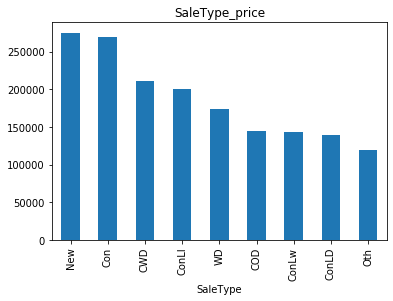

In [46]:
# Most of the assets sale type is "Warranty Deed - Conventional", but the average price vary alot between types
# I'll consider this feature

df_train.groupby(['SaleType']).mean()['SalePrice'].sort_values(ascending=False).plot(kind="bar");
plt.title("SaleType_price");
df_train['SaleType'].value_counts().sort_values(ascending=False)

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
2010     1
1893     1
1875     1
1882     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

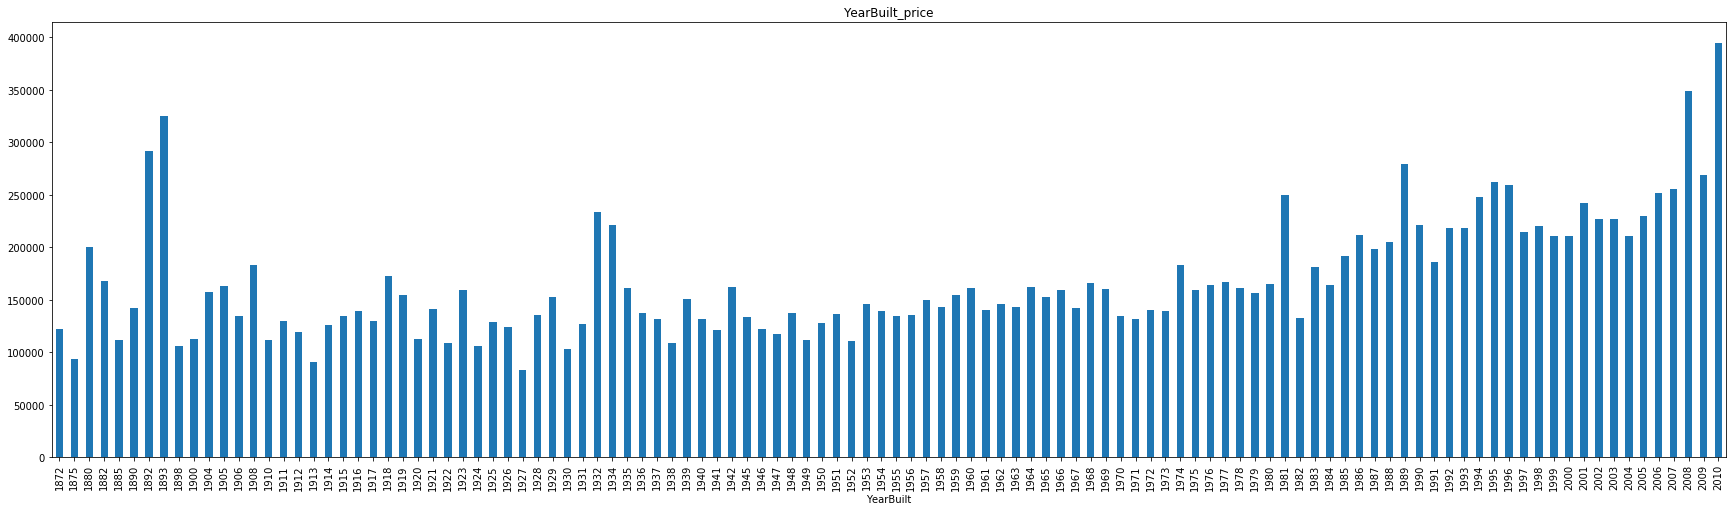

In [52]:
# We can see that the prices of new houses are higher in general than old houses
# I'll consider this feature

df_train.groupby(['YearBuilt']).mean()['SalePrice'].plot(kind="bar", figsize = (30, 8));
plt.title("YearBuilt_price");
df_train['YearBuilt'].value_counts().sort_values(ascending=False)

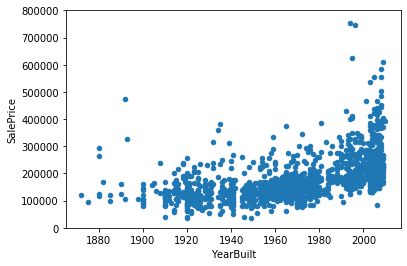

In [54]:
YearBuilt_Sale = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
YearBuilt_Sale.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

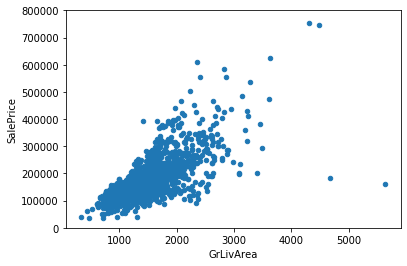

In [53]:
# GrLivArea has almost liner relation with the sale price with few exceptions
# I will consider this feature
# I might remove the outliers (very huge area more than 4000 and lower saleprice than 200000)

GrLivArea_Sale = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
GrLivArea_Sale.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

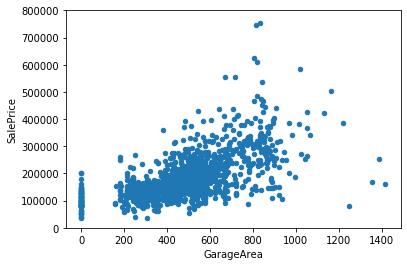

In [49]:
# GarageArea has almost liner relation with the sale price with some exceptions
# Some assets have no garage, and in this case the sales price also vary (of course due to other factors)
# I will consider this feature

GarageArea_Sale = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
GarageArea_Sale.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000));

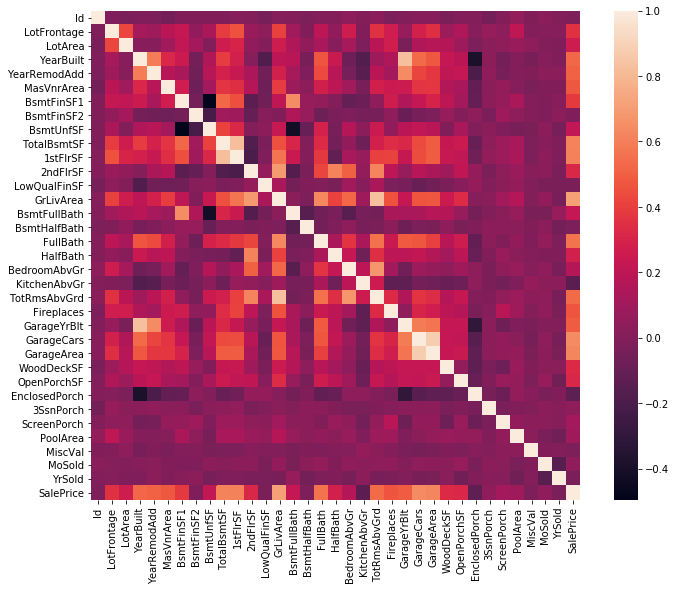

In [56]:
# From the below correlation matrix with numerical features we can find that the sale price is correlated with:
# - area (I have selected GrLiveArea to represent this factor)
# - YearBuilt
# - YearRemodAdd (We can consider it as well)
# - GarageArea and GarageCars (I have selected GarageArea to represent this factor)

corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, square=True, xticklabels=True, yticklabels=True);

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1999     30
1976     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1958     15
1966     15
1990     15
1954     14
1969     14
1991     14
1962     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1956     10
1979     10
1953     10
1975     10
1987     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1952      5
1986      5
1983      5
1951      4
Name: YearRemodAdd, dtype: int64

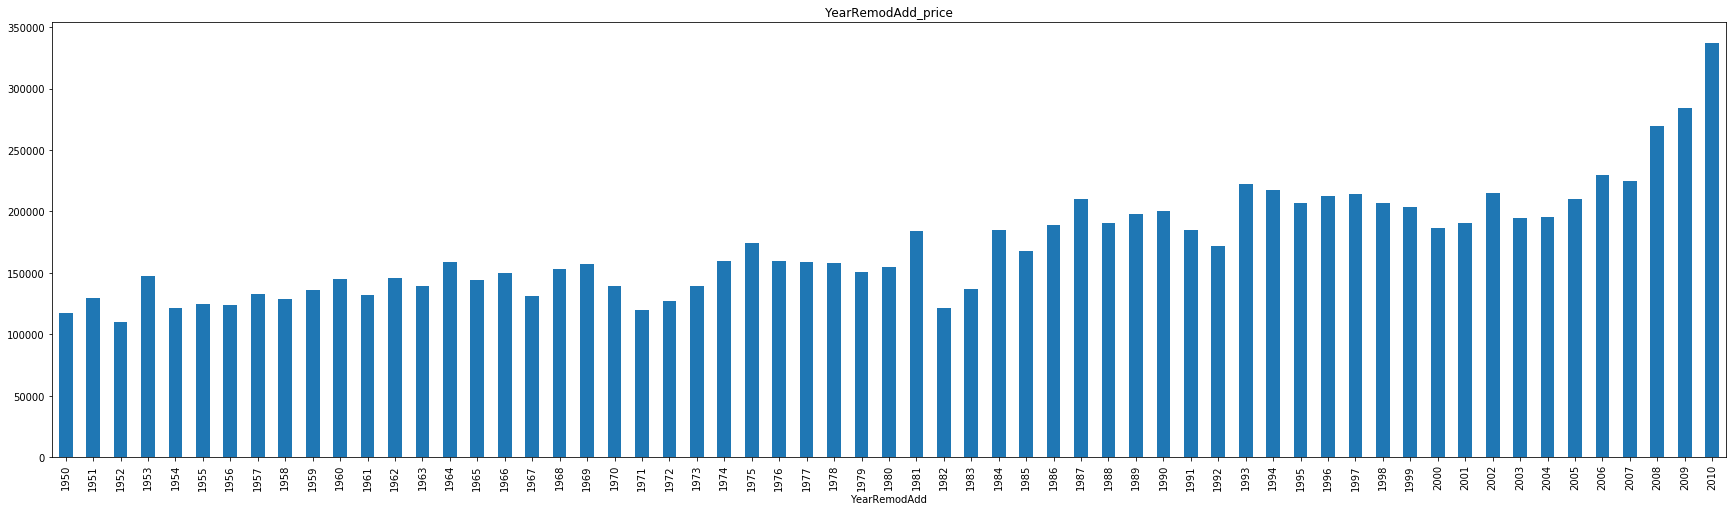

In [57]:

df_train.groupby(['YearRemodAdd']).mean()['SalePrice'].plot(kind="bar", figsize = (30, 8));
plt.title("YearRemodAdd_price");
df_train['YearRemodAdd'].value_counts().sort_values(ascending=False)

In [59]:
#Now let's filter the selected features only
df_train_small = df_train[['MSZoning', 'Neighborhood', 'OverallQual', 'HeatingQC', 'CentralAir', 'SaleType', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageArea', 'SalePrice']]

In [60]:
#Let's have another look at the selected features
#SalePrice has no -ve values
#No -ve values detected in the numerical features which is logic according to their meaning
#Min(YearRemodAdd) > Min(YearBuilt) which is logic
df_train_small.describe()

,YearBuilt,YearRemodAdd,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,1984.865753,1515.463699,472.980137,180921.195890
std,30.202904,20.645407,525.480383,213.804841,79442.502883
min,1872.000000,1950.000000,334.000000,0.000000,34900.000000
25%,1954.000000,1967.000000,1129.500000,334.500000,129975.000000
50%,1973.000000,1994.000000,1464.000000,480.000000,163000.000000
75%,2000.000000,2004.000000,1776.750000,576.000000,214000.000000
max,2010.000000,2010.000000,5642.000000,1418.000000,755000.000000


In [61]:
#No missing values detected in the selected features
datamissing = pd.concat([df_train_small.isnull().sum(), (df_train_small.isnull().sum()/df_train_small.isnull().count())], axis=1, keys=['MissingCount', 'Percent'])
datamissing.head(100)

,MissingCount,Percent
MSZoning,0,0.0
Neighborhood,0,0.0
OverallQual,0,0.0
HeatingQC,0,0.0
CentralAir,0,0.0
SaleType,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
GrLivArea,0,0.0
GarageArea,0,0.0


In [64]:
#Let's clean the data from the outliers (from the GrLivArea_SalePrice analysis we did before)
df_train_small.drop(df_train_small[ (df_train_small['GrLivArea'] > 4000) & (df_train_small['SalePrice'] < 200000)].index, inplace = True)

In [65]:
df_train_small.shape

(1458, 11)

### Now let's go to modeling

In [66]:
def create_dummy_df(df, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    cat_cols = df.select_dtypes(include=['object']).columns
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [67]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [68]:
def print_model_scores(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    y_train_preds, y_test_preds
    print scores 
    '''
    
    #Predict and score the model on training data
    y_train_preds = model.predict(X_train) 
    print("The r-squared score for our model on Training data is {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
    print("The mean_squared_error score for our model on Training data is {} on {} values.".format(mean_squared_error(y_train, y_train_preds), len(y_train)))
    print("The root_mean_squared_error score for our model on Training data is {} on {} values.".format(sqrt(mean_squared_error(y_train, y_train_preds)), len(y_train)))

    print(" ")
    #Predict and score the model on test data
    y_test_preds = model.predict(X_test) 
    print("The r-squared score for our model on Testing data is {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))
    print("The mean_squared_error score for our model on Testing data is {} on {} values.".format(mean_squared_error(y_test, y_test_preds), len(y_test)))
    print("The root_mean_squared_error score for our model on Testing data is {} on {} values.".format(sqrt(mean_squared_error(y_test, y_test_preds)), len(y_test)))
    
    return y_train_preds, y_test_preds

In [78]:
df_train_small_cat = create_dummy_df(df_train_small, dummy_na=False)
df_train_small_cat.shape

(1458, 55)

In [73]:
#Split into explanatory and response variables
y = df_train_small_cat['SalePrice']
X = df_train_small_cat.drop('SalePrice', axis=1)

In [74]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [75]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
#Predict and score the model on training and test data
y_train_preds, y_test_preds = print_model_scores(lm_model, X_train, X_test, y_train, y_test)

The r-squared score for our model on Training data is 0.8752534243636053 on 1020 values.
The mean_squared_error score for our model on Training data is 814318361.9659421 on 1020 values.
The root_mean_squared_error score for our model on Training data is 28536.263980520333 on 1020 values.
 
The r-squared score for our model on Testing data is 0.8612448704175616 on 438 values.
The mean_squared_error score for our model on Testing data is 806672422.4591237 on 438 values.
The root_mean_squared_error score for our model on Testing data is 28401.979199681202 on 438 values.


In [85]:
#Let's get the coef_weights for different features
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
40,OverallQual_10,190406.085234,190406.085234
39,OverallQual_9,115892.551945,115892.551945
29,Neighborhood_StoneBr,61158.487877,61158.487877
31,Neighborhood_Veenker,56674.713200,56674.713200
22,Neighborhood_NoRidge,56267.687455,56267.687455
13,Neighborhood_Crawfor,52246.829973,52246.829973
11,Neighborhood_ClearCr,50719.857184,50719.857184
47,SaleType_Con,49411.544543,49411.544543
38,OverallQual_8,42781.591455,42781.591455
51,SaleType_New,42564.139256,42564.139256


### Let's try another model (XGBoost)

In [102]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.1,vmax_depth = 5, alpha = 10, n_estimators = 100) # Instantiate
xg_reg.fit(X_train, y_train) #Fit

[01:35:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { vmax_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None, vmax_depth=5)

In [103]:
#Predict and score the model on training and test data
y_train_preds, y_test_preds = print_model_scores(xg_reg, X_train, X_test, y_train, y_test)

The r-squared score for our model on Training data is 0.9776200730638545 on 1020 values.
The mean_squared_error score for our model on Training data is 146091268.24193624 on 1020 values.
The root_mean_squared_error score for our model on Training data is 12086.822090274029 on 1020 values.
 
The r-squared score for our model on Testing data is 0.8804069077263292 on 438 values.
The mean_squared_error score for our model on Testing data is 695271228.8482451 on 438 values.
The root_mean_squared_error score for our model on Testing data is 26367.99629945827 on 438 values.
